In [1]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [2]:
# data
train_labels = []   
train_samples = []
for i in range(1000):
    train_labels.append(0)
    train_samples.append(randint(13, 64))
    train_labels.append(1)
    train_samples.append(randint(65, 100))
for i in range(50):
    train_labels.append(1)
    train_samples.append(randint(13, 64))
    train_labels.append(0)
    train_samples.append(randint(65, 100))
    
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [3]:
# preprocessing
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

here you need to focus on the format of the data:

there are array, and the first dimension is data point.

In [46]:
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam, RMSprop 

# from keras.metrics import categorical_crossentropy

In [5]:
# build model
model = Sequential([
    Dense(16, input_shape=(1,), activation="relu"),
    Dense(32, activation="relu"),
    Dense(2, activation="softmax")
])

# another way
model = Sequential()
model.add(Dense(16, input_shape=(1,), activation = "relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(2, activation="softmax"))

W0707 21:58:15.051014 16788 deprecation_wrapper.py:119] From D:\virtualenvs\congyuml\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 21:58:15.301363 16788 deprecation_wrapper.py:119] From D:\virtualenvs\congyuml\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 21:58:15.336318 16788 deprecation_wrapper.py:119] From D:\virtualenvs\congyuml\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 34        
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 6         
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(Adam(lr=0.001),
              loss='sparse_categorical_crossentropy', 
              metrics=["accuracy"])

W0707 21:58:15.503868 16788 deprecation_wrapper.py:119] From D:\virtualenvs\congyuml\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0707 21:58:15.508928 16788 deprecation_wrapper.py:119] From D:\virtualenvs\congyuml\lib\site-packages\keras\backend\tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
model.fit(x=scaled_train_samples, 
          y=train_labels, 
          batch_size=10, 
          epochs=20, 
          #shuffle=True,
          verbose=2
         )

Epoch 1/20
 - 0s - loss: 0.2323 - acc: 0.9410
Epoch 2/20
 - 0s - loss: 0.2305 - acc: 0.9424
Epoch 3/20
 - 0s - loss: 0.2287 - acc: 0.9433
Epoch 4/20
 - 0s - loss: 0.2275 - acc: 0.9443
Epoch 5/20
 - 0s - loss: 0.2258 - acc: 0.9419
Epoch 6/20
 - 0s - loss: 0.2260 - acc: 0.9424
Epoch 7/20
 - 0s - loss: 0.2244 - acc: 0.9476
Epoch 8/20
 - 0s - loss: 0.2238 - acc: 0.9414
Epoch 9/20
 - 0s - loss: 0.2227 - acc: 0.9457
Epoch 10/20
 - 0s - loss: 0.2217 - acc: 0.9486
Epoch 11/20
 - 0s - loss: 0.2211 - acc: 0.9390
Epoch 12/20
 - 0s - loss: 0.2205 - acc: 0.9452
Epoch 13/20
 - 0s - loss: 0.2197 - acc: 0.9433
Epoch 14/20
 - 0s - loss: 0.2190 - acc: 0.9462
Epoch 15/20
 - 0s - loss: 0.2188 - acc: 0.9457
Epoch 16/20
 - 0s - loss: 0.2178 - acc: 0.9481
Epoch 17/20
 - 0s - loss: 0.2172 - acc: 0.9462
Epoch 18/20
 - 0s - loss: 0.2174 - acc: 0.9462
Epoch 19/20
 - 0s - loss: 0.2164 - acc: 0.9448
Epoch 20/20
 - 0s - loss: 0.2166 - acc: 0.9457


In [12]:
# consider validation
model.fit(x=scaled_train_samples,
          y=train_labels,
          epochs=5,
          validation_split=0.2)

# validation with valiation data set
# validation_dataset = [(sample_data, label_data), (sample_data, label_data), ...]
validation_dataset = [(i, j) for i,j in zip(scaled_train_samples[-100:], train_labels[-100:])]
model.fit(x=scaled_train_samples,
          y=train_labels,
          epochs=5,
          validation_dataset=validation_dataset)

Train on 1680 samples, validate on 420 samples
Epoch 1/1
1680/1680 [==============================] - 0s 187us/step - loss: 0.0818 - acc: 0.9940 - val_loss: 0.7646 - val_acc: 0.7619


In [13]:
model.predict(scaled_train_samples[-100:])

array([[0.9645827 , 0.03541731],
       [0.05118062, 0.9488194 ],
       [0.96862787, 0.0313721 ],
       [0.05118062, 0.9488194 ],
       [0.9538437 , 0.04615625],
       [0.05118062, 0.9488194 ],
       [0.97979957, 0.02020046],
       [0.07285822, 0.9271417 ],
       [0.97659403, 0.02340591],
       [0.05118062, 0.9488194 ],
       [0.97979957, 0.02020046],
       [0.05118062, 0.9488194 ],
       [0.9748102 , 0.02518984],
       [0.05118062, 0.9488194 ],
       [0.9580668 , 0.04193313],
       [0.32054546, 0.6794545 ],
       [0.9722244 , 0.0277756 ],
       [0.05118062, 0.9488194 ],
       [0.9708365 , 0.02916346],
       [0.05118062, 0.9488194 ],
       [0.97716093, 0.02283913],
       [0.05118062, 0.9488194 ],
       [0.8159493 , 0.18405065],
       [0.05118062, 0.9488194 ],
       [0.978782  , 0.02121807],
       [0.05118062, 0.9488194 ],
       [0.96862787, 0.0313721 ],
       [0.05118062, 0.9488194 ],
       [0.95158315, 0.0484168 ],
       [0.05118062, 0.9488194 ],
       [0.

In [14]:
model.predict_classes(scaled_train_samples[-100:])

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

# save and load model

In [17]:
import os
PROJECT_FOLDER = os.path.join(os.path.dirname(os.getcwd()), "storage")
os.chdir(PROJECT_FOLDER)
print(os.getcwd())

D:\PyProjects\Machine-Learning-Tech\storage


In [ ]:
from keras.models import load_model

import json
from keras.models import model_from_json

In [ ]:
model.save("dummie_model.h5")
model.load_model("dummie_model.h5")

In [ ]:
# another way, save model shape and weights differently

# save
json_string = model.to_json()
with open("dummie_model.json", "w") as f:
    json.dump(json_string, f)

model.save_weights("dummie_model_weights.h5")

# load
with open("dummie_model.json", "r") as f:
    model = model_form_json(json.load(f))

model.load_weights("dummie_model_weights.h5")

# more examples

## (1) linear model

-- data --

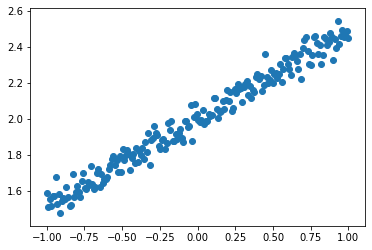

In [37]:
import matplotlib.pyplot as plt

X = np.linspace(-1, 1, 200)
np.random.shuffle(X)    # randomize the data
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, ))

# plot data
plt.scatter(X, Y)
plt.show()

In [38]:
X_train, Y_train = X[:160], Y[:160]     # first 160 data points
X_test, Y_test = X[160:], Y[160:]       # last 40 data points

In [39]:
print(X_train.shape)
print(Y_train.shape)

(160,)
(160,)


-- model --

In [31]:
model = Sequential()
model.add(Dense(1))
model.summary()

model.compile(optimizer = "sgd", loss= "mse")

D:\virtualenvs\congyuml\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  


{'loss': [0.004925656656268984, 0.004803244955837727, 0.004684486644691788]}
[0.004925656656268984, 0.004803244955837727, 0.004684486644691788]


In [ ]:
for i in range(30): # replicated training 
    history = model.fit(X_train, 
                        Y_train, 
                        batch_size=50,  # default to be 32 
                        epochs=3,
                       verbose=0)
    
    # or model.train_on_batch(x,y), it is more recommended
print(history.history)
print(history.history['loss'])

In [29]:
model.evaluate(X_test, Y_test, batch_size=10, verbose=0)  # get the loss

40/40 [==============================] - 0s 99us/step


0.025494484696537256

In [30]:
W,b = model.layers[0].get_weights()
print(W)
print(b)

[[0.7160088]]
[1.9426333]


## (2) NN

-- data --

In [50]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

In [40]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [41]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [42]:
# data pre-processing
# flat the input data
X_train = X_train.reshape(X_train.shape[0], -1) / 255.   # normalize
X_test = X_test.reshape(X_test.shape[0], -1) / 255.      # normalize

# one-hot output data
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [43]:
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


 -- model --

In [44]:
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                25120     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                330       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Another way to define your optimizer
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# We add metrics to get more results you want to see
model.compile(optimizer=rmsprop, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [48]:
model.fit(X_train, y_train, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 2s 40us/step - loss: 0.3373 - acc: 0.9065
Epoch 2/2
60000/60000 [==============================] - 2s 31us/step - loss: 0.1863 - acc: 0.9464


In [49]:
loss, accuracy = model.evaluate(X_test, y_test)

print('test loss: ', loss)
print('test accuracy: ', accuracy)

10000/10000 [==============================] - 0s 19us/step
test loss:  0.1664208527415991
test accuracy:  0.9528
